<h1 style="font-size: 28px;"> FLOYD WARSHALL ALGORITHM:(22PD07,22PD24) </h1>
<p>
<h3>Input:</h3>
A Weighted Di-graph <br>


<h3>Output:</h3>
Shortest Path from each node to every other node in a graph and a graph visualising the shortest possible paths .

</p>


![Image 2](imgs/shortest_path.png)

![Image 3](imgs/graph.png)


In [74]:
import networkx as nx
import matplotlib.pyplot as plt


In [75]:
def floyd_warshall(graph):
    n = len(graph)
    dist = [[float("inf")] * n for _ in range(n)]
    
    # Initialize the distance matrix with edge weights
    for i in range(n):
        dist[i][i] = 0
        for neighbor, weight in graph[i]:
            dist[i][neighbor] = weight

    # Floyd-Warshall algorithm to find shortest paths
    for k in range(n):
        for i in range(n):
            for j in range(n):
                if dist[i][k] + dist[k][j] < dist[i][j]:
                    dist[i][j] = dist[i][k] + dist[k][j]

    # Check for negative cycles
    for i in range(n):
        if dist[i][i] < 0:
            raise ValueError("Negative cycle detected in the graph.")

    return dist


In [76]:
def visualize_graph(graph):
    G = nx.DiGraph()

    node_index = {}  # Map node names to incremental index
    index = 0
    for node, neighbors in graph.items():
        if node not in node_index:
            node_index[node] = index
            index += 1
        for neighbor, weight in neighbors:  # Assume neighbors is a list of tuples
            if neighbor not in node_index:
                node_index[neighbor] = index
                index += 1
            G.add_edge(node_index[node], node_index[neighbor], weight=weight)

    pos = nx.spring_layout(G, seed=42)
    edge_labels = {(node, neighbor): G[node][neighbor]['weight'] for node, neighbor in G.edges()}

    plt.figure(figsize=(12, 8))
    node_sizes = [1500 for _ in range(len(G))]
    node_colors = ['skyblue' for _ in range(len(G))]
    labels = {index: node for node, index in node_index.items()}  # Use original node names for labels

    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5, edge_color='black')
    nx.draw_networkx_labels(G, pos, labels=labels, font_color='black', font_weight='bold')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

    plt.title('Graph Visualization', fontsize=16)
    plt.axis('off')
    plt.tight_layout()
    plt.show()



<h5> Spring_layout will caculate the node positions using spring layout algorithm.It assigns position to make the viusal appeal of the graph good.<br>In the above fn pos will contain an array like:</h5>

![Image 1](imgs/pos_array1.png)


In [77]:
def input_graph():
    graph = {}
    n = int(input("Enter the number of vertices: "))
    
    for i in range(n):
        edges = []

        while True:
            neighbor = int(input(f"Enter the neighbor vertex for vertex {i} (-1 to stop): "))
            if neighbor == -1:
                break
    
            weight = int(input(f"Enter the weight for edge ({i}, {neighbor}): "))
            edges.append((neighbor, weight))
    
        graph[i] = edges
    
    
    return graph

<h5>We output graph as a dictionary.Where each node represents a key and its value contains a list which 2D and contains the node neighbouring to the key and the corresponding key-neighbouring node weight.</h5>

Shortest path from 0 to 0 is 0
Shortest path from 0 to 1 is 3
Shortest path from 0 to 2 is 7
Shortest path from 0 to 3 is 5
Shortest path from 1 to 0 is 2
Shortest path from 1 to 1 is 0
Shortest path from 1 to 2 is 6
Shortest path from 1 to 3 is 4
Shortest path from 2 to 0 is 3
Shortest path from 2 to 1 is 1
Shortest path from 2 to 2 is 0
Shortest path from 2 to 3 is 5
Shortest path from 3 to 0 is 5
Shortest path from 3 to 1 is 3
Shortest path from 3 to 2 is 2
Shortest path from 3 to 3 is 0


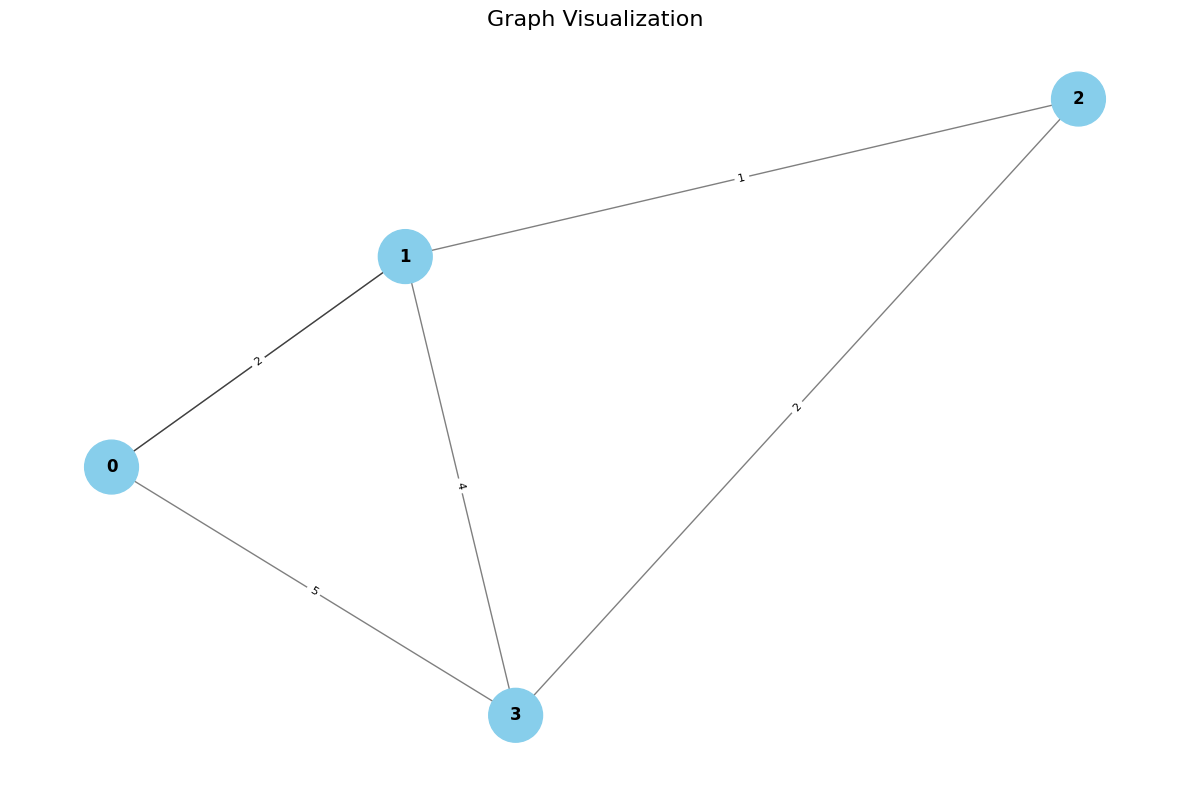




-----------------------
Shortest paths have been calculated using the Floyd-Warshall algorithm.


In [78]:
if __name__ == "__main__":
    graph = input_graph()
    dist = floyd_warshall(graph)

    for i in range(len(graph)):
        for j in range(len(graph)):
            print(f"Shortest path from {i} to {j} is {dist[i][j]}")

    visualize_graph(graph)

    
    print("\n\n")
    print("-----------------------")
    print("Shortest paths have been calculated using the Floyd-Warshall algorithm.")
    
